## Non-negative matrix factorization: Iris clustering ##

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [30]:
# Load the Iris dataset: 4 dimensions

iris = load_iris()
X = iris.data
y = iris.target

# NMF requires non-negative data, so scale it to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Apply Non-negative Matrix Factorization
n_components = 2  # reduce to 2 components for visualization
nmf = NMF(n_components=n_components, init='random', random_state=42, max_iter=2000)
X_nmf = nmf.fit_transform(X_scaled)
H_nmf = nmf.components_

print ('Error=',nmf.reconstruction_err_)

print("Shape of original data:", X_scaled.shape)
print("Shape after NMF:", X_nmf.shape)

Error= 1.3685227967825442
Shape of original data: (150, 4)
Shape after NMF: (150, 2)


In [32]:
rows, cols = len(X_nmf), len(X_nmf[0])

# Argmax per  row

labels=  [max(range(len(row)), key=lambda j: row[j]) for row in X_nmf]

In [33]:
X_nmf[0,:]

array([0.85170774, 0.05199281])

### Cluster instances ###

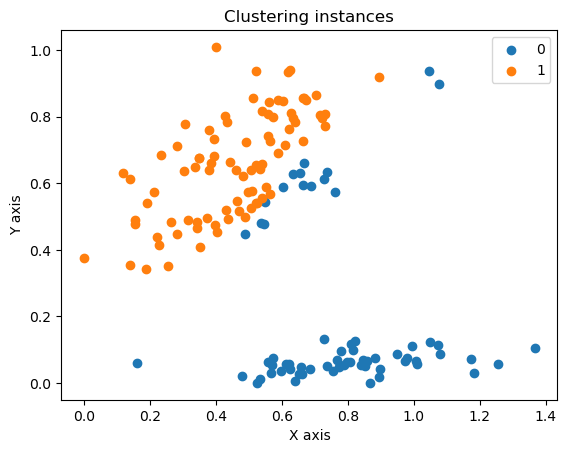

In [34]:

# Get unique labels (clusters)
unique_labels = np.unique(labels)

# Plot each cluster separately
for label in unique_labels:
    points = X_nmf[labels == label]  # select rows with this label
    plt.scatter(points[:, 0], points[:, 1], label=label) 

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Clustering instances')
plt.legend()
plt.show()

### Cluster features ###

In [35]:
H_nmf
featuresM= H_nmf.T

In [36]:
rows, cols = len(featuresM), len(featuresM[0])

# Argmax per  row

labels=  [max(range(len(row)), key=lambda j: row[j]) for row in featuresM]

In [37]:
labels

[1, 0, 1, 1]

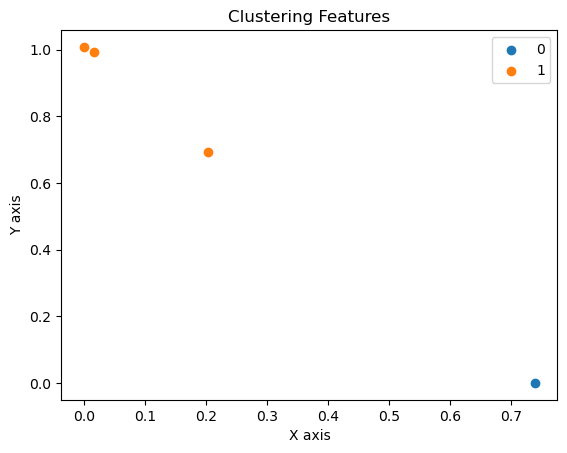

In [38]:
# Get unique labels (clusters)
unique_labels = np.unique(labels)

# Plot each cluster separately
for label in unique_labels:
    points = featuresM[labels == label]  # select rows with this label
    plt.scatter(points[:, 0], points[:, 1], label=label) 

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Clustering Features')
plt.legend()
plt.show()